Step 1: Import Necessary Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


Step 2: Load the Datasets

In [11]:
# Load sales data
sales_df = pd.read_csv("../data/raw/sales/sales.csv")

# Display the first few rows
sales_df.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_14136\1728697011.py:2: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv("../data/raw/sales/sales.csv")


,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN


Step 3: Check for Missing Values & Data Types

In [12]:
print(sales_df.info())
print(sales_df.isnull().sum())  # Count missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19454838 entries, 0 to 19454837
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   product_id             object 
 1   store_id               object 
 2   date                   object 
 3   sales                  float64
 4   revenue                float64
 5   stock                  float64
 6   price                  float64
 7   promo_type_1           object 
 8   promo_bin_1            object 
 9   promo_type_2           object 
 10  promo_bin_2            object 
 11  promo_discount_2       float64
 12  promo_discount_type_2  object 
dtypes: float64(5), object(8)
memory usage: 1.9+ GB
None
product_id                      0
store_id                        0
date                            0
sales                     1190762
revenue                   1190762
stock                     1190762
price                      571981
promo_type_1                    0
promo_bin_1     

Step 4: Summary Statistics

In [13]:
sales_df.describe()

,sales,revenue,stock,price,promo_discount_2
count,1.826408e+07,1.826408e+07,1.826408e+07,1.888286e+07,59081.000000
mean,4.361900e-01,2.064174e+00,1.588102e+01,1.558334e+01,25.516494
std,1.466364e+01,3.989569e+01,3.728009e+01,3.229611e+01,11.064229
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,10.000000
25%,0.000000e+00,0.000000e+00,4.000000e+00,3.350000e+00,19.000000
50%,0.000000e+00,0.000000e+00,8.000000e+00,7.950000e+00,20.000000
75%,0.000000e+00,0.000000e+00,1.700000e+01,1.690000e+01,33.000000
max,4.330100e+04,8.419796e+04,4.716000e+03,1.599000e+03,50.000000


 Step 5: Convert date Column to Datetime Format

In [14]:
# Convert date column to datetime format
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Set index to date for time series analysis
sales_df.set_index('date', inplace=True)

# Display updated info
sales_df.info()

sales_df = sales_df[~sales_df.index.duplicated(keep='first')]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19454838 entries, 2017-01-02 to 2019-12-29
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   product_id             object 
 1   store_id               object 
 2   sales                  float64
 3   revenue                float64
 4   stock                  float64
 5   price                  float64
 6   promo_type_1           object 
 7   promo_bin_1            object 
 8   promo_type_2           object 
 9   promo_bin_2            object 
 10  promo_discount_2       float64
 11  promo_discount_type_2  object 
dtypes: float64(5), object(7)
memory usage: 1.9+ GB


Step 6: Basic Visualizations

(A) Sales Trend Over Time

C:\Users\DELL\AppData\Local\Temp\ipykernel_14136\2726910048.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sales_df, x=sales_df.index, y="sales", ci=None)


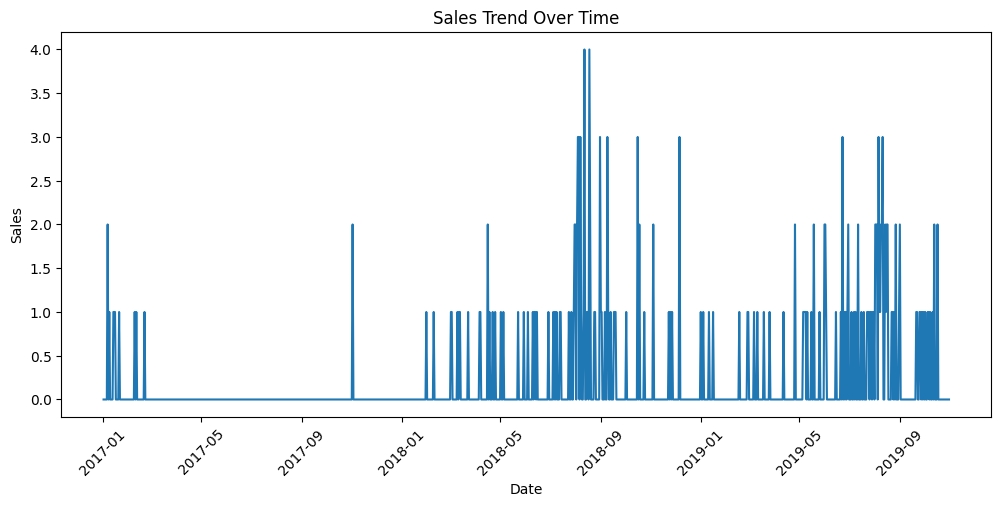

In [15]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=sales_df, x=sales_df.index, y="sales", ci=None)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

(B) Distribution of Sales Values

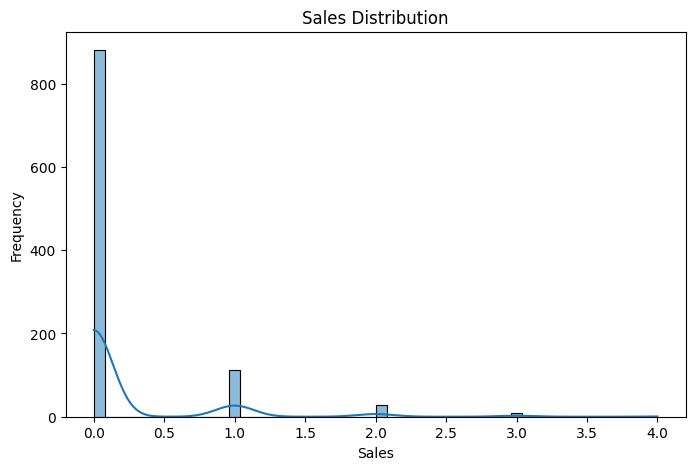

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(sales_df["sales"], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

(C) Revenue Trend Over Time

C:\Users\DELL\AppData\Local\Temp\ipykernel_14136\4238326975.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sales_df, x=sales_df.index, y="revenue", ci=None, color="green")


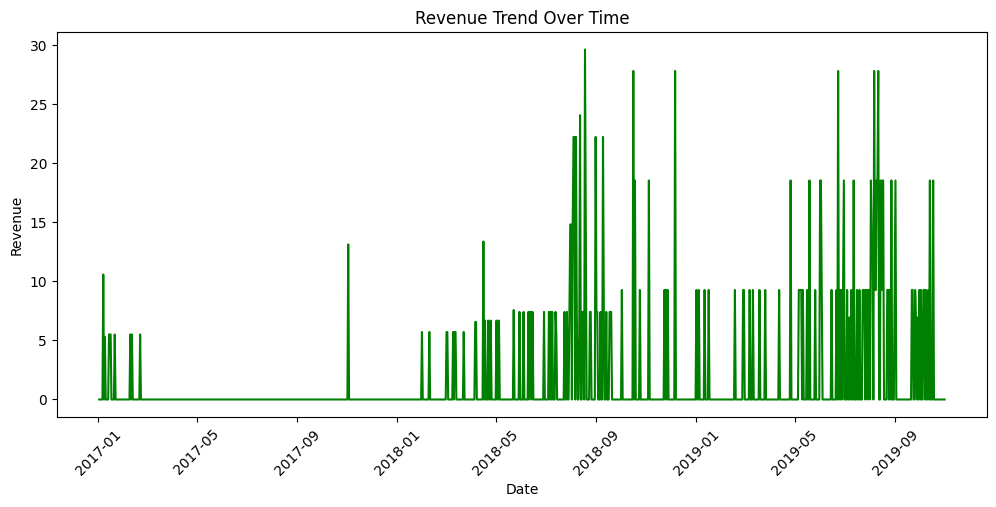

In [17]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=sales_df, x=sales_df.index, y="revenue", ci=None, color="green")
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

 (D) Sales Impact of Promotions

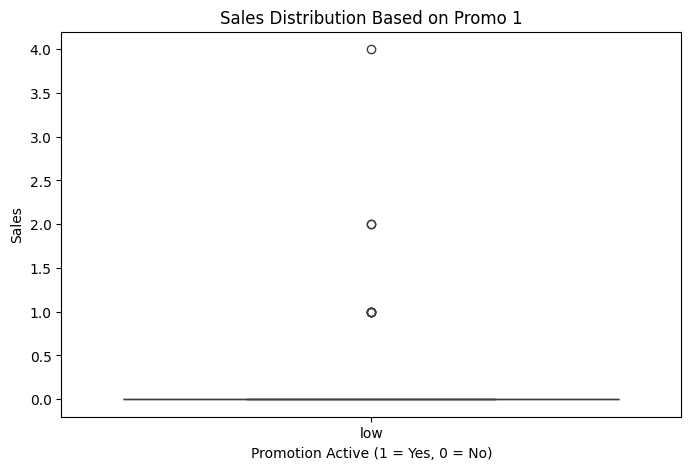

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=sales_df["promo_bin_1"], y=sales_df["sales"])
plt.title("Sales Distribution Based on Promo 1")
plt.xlabel("Promotion Active (1 = Yes, 0 = No)")
plt.ylabel("Sales")
plt.show()

Phase - 2

Step 1: Feature Engineering

In [31]:
# Ensure the index is in datetime format
sales_df.index = pd.to_datetime(sales_df.index)

# Extracting time-based features
sales_df["year"] = sales_df.index.year
sales_df["month"] = sales_df.index.month
sales_df["day"] = sales_df.index.day
sales_df["day_of_week"] = sales_df.index.dayofweek  # Monday=0, Sunday=6
sales_df["week_of_year"] = sales_df.index.isocalendar().week
sales_df["quarter"] = sales_df.index.quarter

# Check updated dataset
print(sales_df.head())


            sales  year  month  day  day_of_week  week_of_year  quarter  \
date                                                                      
2017-03-03    0.0  2017      3    3            4             9        1   
2017-03-04    0.0  2017      3    4            5             9        1   
2017-03-05    0.0  2017      3    5            6             9        1   
2017-03-06    0.0  2017      3    6            0            10        1   
2017-03-07    0.0  2017      3    7            1            10        1   

            lag_1  lag_7  lag_30  rolling_mean_7  rolling_mean_30  
date                                                               
2017-03-03    0.0    0.0     0.0             0.0              0.1  
2017-03-04    0.0    0.0     0.0             0.0              0.1  
2017-03-05    0.0    0.0     0.0             0.0              0.1  
2017-03-06    0.0    0.0     0.0             0.0              0.1  
2017-03-07    0.0    0.0     0.0             0.0              0.1 

Step 2: Handling Seasonality & Lag Features

In [27]:
# Lag features (previous sales for 1, 7, and 30 days)
sales_df["lag_1"] = sales_df["sales"].shift(1)
sales_df["lag_7"] = sales_df["sales"].shift(7)
sales_df["lag_30"] = sales_df["sales"].shift(30)

# Rolling Mean (Smoothing)
sales_df["rolling_mean_7"] = sales_df["sales"].rolling(window=7).mean()
sales_df["rolling_mean_30"] = sales_df["sales"].rolling(window=30).mean()

# Dropping NaN values from rolling calculations
sales_df.dropna(inplace=True)

# Check final dataset
print(sales_df.head())

            sales  year  month  day  day_of_week  week_of_year  quarter  \
date                                                                      
2017-03-03    0.0  2017      3    3            4             9        1   
2017-03-04    0.0  2017      3    4            5             9        1   
2017-03-05    0.0  2017      3    5            6             9        1   
2017-03-06    0.0  2017      3    6            0            10        1   
2017-03-07    0.0  2017      3    7            1            10        1   

            lag_1  lag_7  lag_30  rolling_mean_7  rolling_mean_30  
date                                                               
2017-03-03    0.0    0.0     0.0             0.0              0.1  
2017-03-04    0.0    0.0     0.0             0.0              0.1  
2017-03-05    0.0    0.0     0.0             0.0              0.1  
2017-03-06    0.0    0.0     0.0             0.0              0.1  
2017-03-07    0.0    0.0     0.0             0.0              0.1 

Step 3: Train-Test Split for Model Preparation

In [28]:
from sklearn.model_selection import train_test_split

# Selecting features for modeling
features = ["year", "month", "day", "day_of_week", "week_of_year", "quarter",
            "lag_1", "lag_7", "lag_30", "rolling_mean_7", "rolling_mean_30"]
target = "sales"

# Splitting the dataset
train_df, test_df = train_test_split(sales_df, test_size=0.2, shuffle=False)

# Training and test features
X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# Display shape
print("Train Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)

Train Set: (825, 11) (825,)
Test Set: (207, 11) (207,)
